# Plotting routine for the Sep22 Event

In [1]:
test = 'test'

In [2]:
%load_ext autoreload

%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pickle as p

import datetime as datetime
from datetime import timedelta
import seaborn as sns
import pandas as pd
import os
#import copy as cp

import multiprocessing

import py3dcore_h4c as py3dcore_h4c

import py3dcore_h4c.fluxplot as fp


plt.switch_backend('agg')

import warnings
warnings.filterwarnings('ignore')

import logging

logging.basicConfig(level=logging.INFO)
logging.getLogger("heliosat.spice").setLevel("WARNING")
logging.getLogger("heliosat.spacecraft").setLevel("WARNING")
logging.getLogger("sunpy").setLevel("WARNING")
logging.getLogger("py3dcore_h4c.fluxplot").setLevel("WARNING")

#print(sns.__version__)

#### setting the times for py3DCORE_h4c

In [3]:
t_launch = datetime.datetime(2022, 9, 5, 18, 45, tzinfo=datetime.timezone.utc) # launch time assumed at CME impact at PSP at 14.72 Rs

t_s = datetime.datetime(2022, 9, 7, 8, tzinfo=datetime.timezone.utc) 
t_e = datetime.datetime(2022, 9, 8, 3, tzinfo=datetime.timezone.utc)

start = t_s + datetime.timedelta(hours=1)

t_fit = [
        datetime.datetime(2022, 9, 7, 9, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 7, 15, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 7, 20, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 8, 2, tzinfo=datetime.timezone.utc)
     ]

#t_fit = fp.equal_t_creator(start = start, n = 4, delta = 6)

#####2022 Sep 5: 3 solar radii at 17 UT (COR2 & LASCO FoV appearance)
# 2022 Sep 5: 15 solar radii at 18:45 UT (PSP)

#### loading the pickle files

In [4]:
t_fit

[datetime.datetime(2022, 9, 7, 9, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 7, 15, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 7, 20, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 8, 2, 0, tzinfo=datetime.timezone.utc)]

In [5]:
path = 'output/solo06092022_heeq_1024_restrP_3/'

filepath = fp.loadpickle(path, number = -1)

#### extracting parameters

In [6]:
res, allres, ind, meanparams = fp.get_params(filepath, give_mineps=True)

In [7]:
out = fp.get_ensemble_stats(filepath)

In [8]:
out.describe()

,lon,lat,inc,D1AU,delta,launch radius,launch speed,t factor,B1AU,gamma,vsw
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,172.789047,-20.968996,5.317990,0.435775,1.478697,15.027008,1481.486328,112.390656,36.826805,1.093474,630.816956
std,4.882709,4.488092,4.345445,0.031588,0.263533,0.534286,266.255157,27.676064,8.246074,0.413015,50.562969
min,157.494064,-29.956089,0.001406,0.343108,1.000628,14.001570,1000.068115,50.016071,9.407163,0.202732,409.386261
25%,169.609138,-24.157467,1.891583,0.413905,1.269414,14.581626,1263.906952,93.510096,30.784392,0.776106,604.079590
50%,172.701210,-21.140834,4.342335,0.435523,1.461018,15.056036,1472.353882,111.103722,37.579033,1.072614,641.642914
75%,175.867821,-17.759146,7.515204,0.459575,1.661660,15.468526,1690.569000,132.097923,43.515741,1.409288,669.390167
max,199.343094,-6.955032,25.087234,0.499819,2.466285,15.997504,1998.125488,209.505661,49.992947,1.997228,699.978271


#### loading and plotting the fitting results

In [10]:
fp.fullinsitu(observer='solo', t_fit=t_fit, start=t_s, end=t_e, filepath=filepath, 
              custom_data='solo_2022sep.p', best=False, ensemble=True, mean=True, save_fig=True, legend=True, fixed=None)

INFO:py3dcore_h4c.fitter.base:Using custom datafile: solo_2022sep.p


In [11]:
fp.scatterparams(filepath)

#### Plotting the fluxrope and spacecraft positions

In [10]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 7, 1)
tm1 =  t_launch + datetime.timedelta(days=1.7)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d(spacecraftlist=['solo', 'psp'], planetlist =['Earth'],t = tm1, filepath = filepath)

#### make fluxrope 3d movie

In [13]:
def make_frame(k):
    tm0 = datetime.datetime(2022, 9, 5, 19)
    t = tm0 + k*datetime.timedelta(hours=1)
    
    fig = fp.full3d(spacecraftlist=['solo', 'psp'], planetlist =['Earth'],
              t = t, filepath = filepath, save_fig = False)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d/'+frmstr+'.jpg',dpi=200)  
    return fig
    

In [14]:
inn=[i for i in range(100)]


mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[0:20])
mpool.close()
mpool.join()

print('done 1/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[20:40])
mpool.close()
mpool.join()

print('done 2/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[40:60])
mpool.close()
mpool.join()

print('done 3/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[40:80])
mpool.close()
mpool.join()

print('done 4/4')

done 1/4
done 2/4
done 3/4
done 4/4


In [15]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d/full_3d_movie.mp4 -y -loglevel quiet')

0

#### plot fluxrope 3d multiview

In [9]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 7, 1)
tm1 =  t_launch + datetime.timedelta(days=1.7)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d_multiview(t_launch = t_launch, filepath=filepath)

### make fluxrope 3d multiview movie

In [10]:
def make_frame_3d(k):

    tm0 = datetime.datetime(2022, 9, 5, 19)
    t = tm0 + k*datetime.timedelta(hours=1)
    
    fig = fp.full3d_multiview_movie(t_launch = tm0, t=t, filepath=filepath, 
                                    frametime = k)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d_multiview/'+frmstr+'.jpg',dpi=200)  
    return fig

In [11]:
inn=[i for i in range(100)]


mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame_3d, inn[0:20])
mpool.close()
mpool.join()

print('done 1/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame_3d, inn[20:40])
mpool.close()
mpool.join()

print('done 2/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame_3d, inn[40:60])
mpool.close()
mpool.join()

print('done 3/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame_3d, inn[40:80])
mpool.close()
mpool.join()

print('done 4/4')

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
done 1/4
done 2/4
done 3/4
done 4/4


In [12]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d_multiview/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d_multiview/full_3d_multiview_movie.mp4 -y -loglevel quiet')

0

# Used for Debug

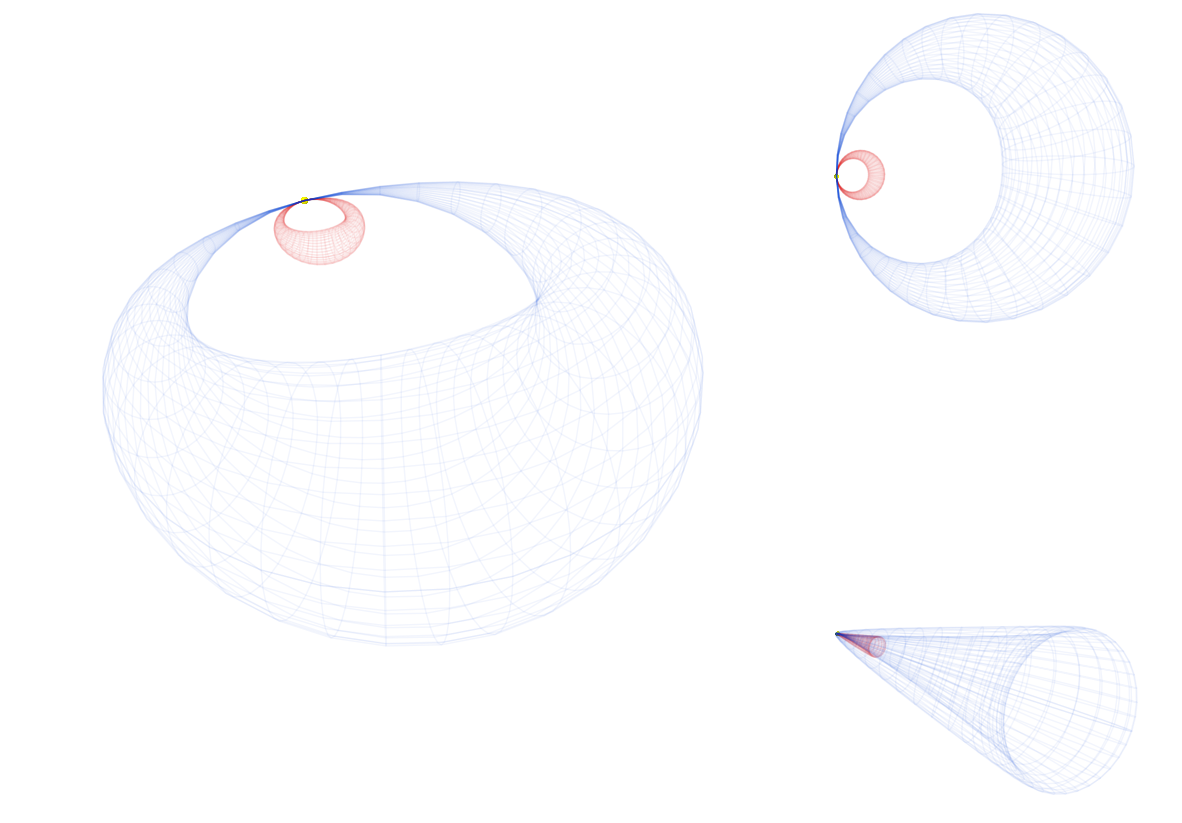